# Regresion con ANN (prediccion de una variable continua)

## Dataset: Student Performance

---

## 1. Librerias

In [1]:
import pandas as pd
from src.data_prep import ProcesadoEDA

In [2]:
pd.set_option('display.max_columns', None)

## 2. Carga de Datos

In [3]:
student_performance = pd.read_csv('../data/processed/student_performance.csv', sep=',', na_values=[''], quotechar='"')

In [4]:
procesado = ProcesadoEDA(student_performance)

In [5]:
procesado.mostrar_head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,math
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,math
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,math
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,math
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,math


In [6]:
procesado.mostrar_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [7]:
procesado.mostrar_dimensiones()

(1044, 34)

In [8]:
procesado.mostrar_valores_nulos()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
subject       0
dtype: int64

## 3. Limpieza inicial

In [9]:
procesado.resum_transpose()

,count,mean,std,min,25%,50%,75%,max
age,1044.0,16.726054,1.239975,15.0,16.0,17.0,18.0,22.0
Medu,1044.0,2.603448,1.124907,0.0,2.0,3.0,4.0,4.0
Fedu,1044.0,2.387931,1.099938,0.0,1.0,2.0,3.0,4.0
traveltime,1044.0,1.522989,0.731727,1.0,1.0,1.0,2.0,4.0
studytime,1044.0,1.970307,0.834353,1.0,1.0,2.0,2.0,4.0
failures,1044.0,0.264368,0.656142,0.0,0.0,0.0,0.0,3.0
famrel,1044.0,3.935824,0.933401,1.0,4.0,4.0,5.0,5.0
freetime,1044.0,3.201149,1.031507,1.0,3.0,3.0,4.0,5.0
goout,1044.0,3.156130,1.152575,1.0,2.0,3.0,4.0,5.0
Dalc,1044.0,1.494253,0.911714,1.0,1.0,1.0,2.0,5.0


### 3.1 Visualizaciones

In [10]:
procesado.var_correlacion('G3')

--- Correlación con G3 ---


G3            1.000000
G2            0.910743
G1            0.809142
Medu          0.201472
studytime     0.161629
Fedu          0.159796
famrel        0.054461
absences     -0.045671
freetime     -0.064890
health       -0.080079
goout        -0.097877
traveltime   -0.102627
Walc         -0.115740
age          -0.125282
Dalc         -0.129642
failures     -0.383145
Name: G3, dtype: float64

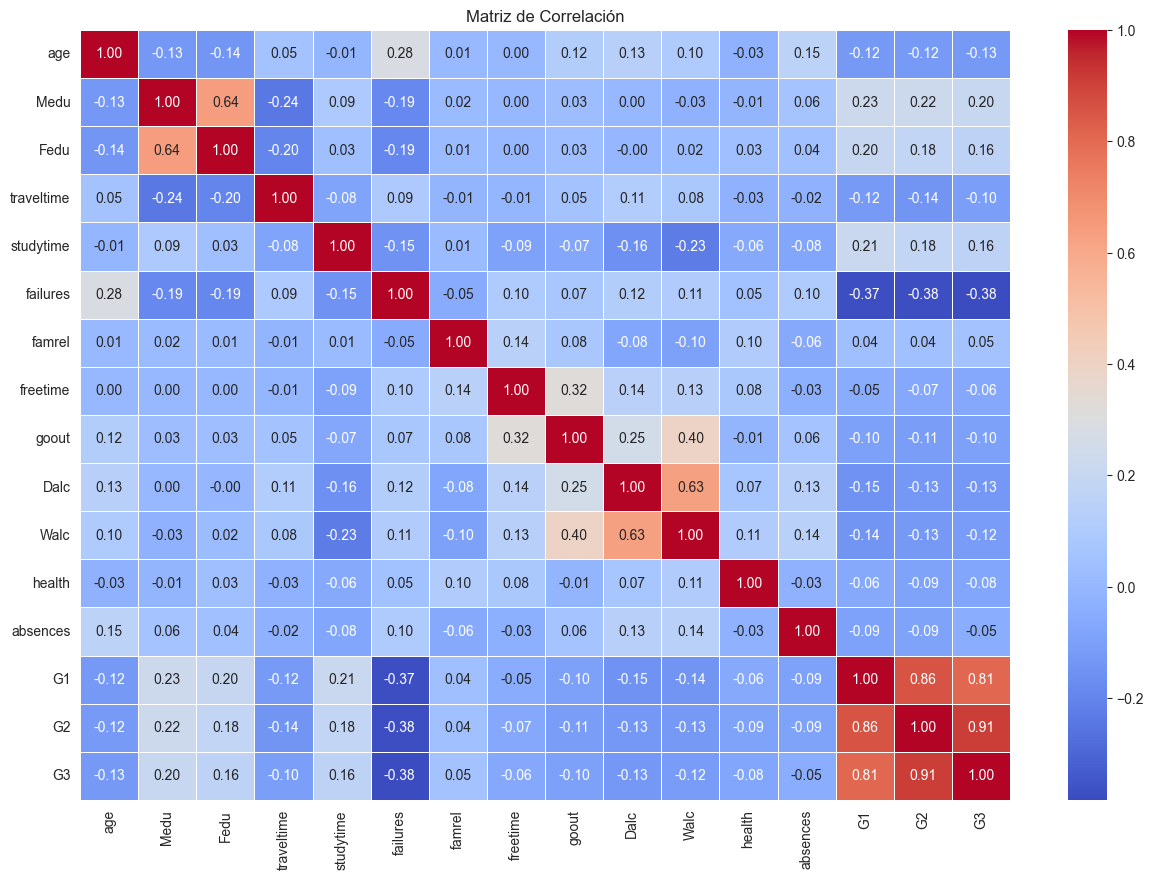

In [13]:
procesado.grafico_correlación()

### 3.2 Limpieza final

In [14]:
procesado.ch_bool()

C:\PythonProject\Proyecto-AI\src\data_prep.py:38: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.df[columnas_binarias] = self.df[columnas_binarias].replace({'yes': 1, 'no': 0})
C:\PythonProject\Proyecto-AI\src\data_prep.py:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.df['famsize'] = self.df['famsize'].replace({'LE3': 1, 'GT3': 0})
C:\PythonProject\Proyecto-AI\src\data_prep.py:40: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explici

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,1,0,18,1,0,0,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,1
1,1,0,17,1,0,1,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,1
2,1,0,15,1,1,1,1,1,at_home,other,other,mother,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,1
3,1,0,15,1,0,1,4,2,health,services,home,mother,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,1
4,1,0,16,1,0,1,3,3,other,other,home,father,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,0,19,0,0,1,2,3,services,other,course,mother,1,3,1,0,0,0,1,0,1,1,0,5,4,2,1,2,5,4,10,11,10,0
1040,0,0,18,1,1,1,3,1,teacher,services,course,mother,1,2,0,0,1,0,0,1,1,1,0,4,3,4,1,1,1,4,15,15,16,0
1041,0,0,18,1,0,1,1,1,other,other,course,mother,2,2,0,0,0,0,1,1,1,0,0,1,1,1,1,1,5,6,11,12,9,0
1042,0,1,17,1,1,1,3,1,services,services,course,mother,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,6,10,10,10,0


In [15]:
procesado.mostrar_head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,1,0,18,1,0,0,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,1
1,1,0,17,1,0,1,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,1
2,1,0,15,1,1,1,1,1,at_home,other,other,mother,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,1
3,1,0,15,1,0,1,4,2,health,services,home,mother,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,1
4,1,0,16,1,0,1,3,3,other,other,home,father,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,1


### 3.3 Feature Engineering (Creacion de Variables Derivadas)

In [16]:
# 1. Promedio de notas (G1 y G2)
procesado.df['avg_prev_grades'] = (procesado.df['G1'] + procesado.df['G2']) / 2

# 2. Tasa de ausencias (normalizada)
max_ausencias = procesado.df['absences'].max()
if max_ausencias > 0:
    procesado.df['absence_rate'] = procesado.df['absences'] / max_ausencias
else:
    procesado.df['absence_rate'] = 0

print("Variables derivadas creadas:")
print("  1. avg_prev_grades: Promedio de calificaciones G1 y G2")
print("  2. absence_rate: Tasa de ausencias normalizada (0-1)")

Variables derivadas creadas:
  1. avg_prev_grades: Promedio de calificaciones G1 y G2
  2. absence_rate: Tasa de ausencias normalizada (0-1)


In [17]:
# Verificar las nuevas variables
print("\nPrimeras filas con variables derivadas:")
columnas_mostrar = ['G1', 'G2', 'avg_prev_grades', 'absences', 'absence_rate', 'G3']
print(procesado.df[columnas_mostrar].head(10))


Primeras filas con variables derivadas:
   G1  G2  avg_prev_grades  absences  absence_rate  G3
0   5   6              5.5         6      0.080000   6
1   5   5              5.0         4      0.053333   6
2   7   8              7.5        10      0.133333  10
3  15  14             14.5         2      0.026667  15
4   6  10              8.0         4      0.053333  10
5  15  15             15.0        10      0.133333  15
6  12  12             12.0         0      0.000000  11
7   6   5              5.5         6      0.080000   6
8  16  18             17.0         0      0.000000  19
9  14  15             14.5         0      0.000000  15


In [18]:
# Estadisticas de las nuevas variables
print("\nEstadisticas de variables derivadas:")
print(procesado.df[['avg_prev_grades', 'absence_rate']].describe())


Estadisticas de variables derivadas:
       avg_prev_grades  absence_rate
count      1044.000000   1044.000000
mean         11.229885      0.059132
std           3.021785      0.082800
min           2.000000      0.000000
25%           9.000000      0.000000
50%          11.000000      0.026667
75%          13.500000      0.080000
max          19.000000      1.000000


In [19]:
# Correlacion con G3
print("\nCorrelacion con G3:")
correlaciones = procesado.df[['avg_prev_grades', 'absence_rate', 'G3']].corr()['G3'].drop('G3')
print(correlaciones)


Correlacion con G3:
avg_prev_grades    0.894479
absence_rate      -0.045671
Name: G3, dtype: float64


### 3.4 One-Hot Encoding

In [20]:
columnas_categoricas = ['Mjob', 'Fjob', 'reason', 'guardian']
procesado.aplicar_dummies(columnas_categoricas)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject,avg_prev_grades,absence_rate,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1,0,18,1,0,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,1,5.5,0.080000,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False
1,1,0,17,1,0,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,1,5.0,0.053333,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False
2,1,0,15,1,1,1,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,1,7.5,0.133333,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False
3,1,0,15,1,0,1,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,1,14.5,0.026667,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False
4,1,0,16,1,0,1,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,1,8.0,0.053333,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,0,19,0,0,1,2,3,1,3,1,0,0,0,1,0,1,1,0,5,4,2,1,2,5,4,10,11,10,0,10.5,0.053333,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False
1040,0,0,18,1,1,1,3,1,1,2,0,0,1,0,0,1,1,1,0,4,3,4,1,1,1,4,15,15,16,0,15.0,0.053333,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False
1041,0,0,18,1,0,1,1,1,2,2,0,0,0,0,1,1,1,0,0,1,1,1,1,1,5,6,11,12,9,0,11.5,0.080000,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,True,False
1042,0,1,17,1,1,1,3,1,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,6,10,10,10,0,10.0,0.080000,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False


In [21]:
procesado.mostrar_head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject,avg_prev_grades,absence_rate,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1,0,18,1,0,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,1,5.5,0.080000,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False
1,1,0,17,1,0,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,1,5.0,0.053333,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False
2,1,0,15,1,1,1,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,1,7.5,0.133333,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False
3,1,0,15,1,0,1,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,1,14.5,0.026667,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False
4,1,0,16,1,0,1,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,1,8.0,0.053333,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False


In [22]:
procesado.mostrar_dimensiones()

(1044, 49)

## 4. Train Test Split

In [23]:
variables_excluir = ['G3']
target = 'G3'

X_train, X_test, y_train, y_test = procesado.train_test_x_y(
    val_dropX=variables_excluir,
    val_selectY=target,
    test_size=0.2,
    random_state=101
)

In [24]:
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (835, 48)
X_test: (209, 48)
y_train: (835,)
y_test: (209,)


## 5. Escalado de los datos (Normalizacion)

In [25]:
X_train_scaled, X_test_scaled, scaler = procesado.escalado_val(X_train, X_test)

In [26]:
print(f"X_train_scaled: {X_train_scaled.shape}")
print(f"X_test_scaled: {X_test_scaled.shape}")

X_train_scaled: (835, 48)
X_test_scaled: (209, 48)


## 6. Guardar Datos Procesados

In [27]:
# Guardar datos sin escalar
procesado.guardar_csv(X_train, 'X_train.csv', '../data/processed')
procesado.guardar_csv(X_test, 'X_test.csv', '../data/processed')

# Guardar datos escalados
procesado.guardar_csv(X_train_scaled, 'X_train_scaled.csv', '../data/processed')
procesado.guardar_csv(X_test_scaled, 'X_test_scaled.csv', '../data/processed')

# Guardar y (target)
procesado.guardar_csv(y_train, 'y_train.csv', '../data/processed')
procesado.guardar_csv(y_test, 'y_test.csv', '../data/processed')

Archivo 'X_train.csv' guardado en: ../data/processed\X_train.csv
Archivo 'X_test.csv' guardado en: ../data/processed\X_test.csv
Archivo 'X_train_scaled.csv' guardado en: ../data/processed\X_train_scaled.csv
Archivo 'X_test_scaled.csv' guardado en: ../data/processed\X_test_scaled.csv
Archivo 'y_train.csv' guardado en: ../data/processed\y_train.csv
Archivo 'y_test.csv' guardado en: ../data/processed\y_test.csv


## 7. Guardar Scaler

In [28]:
import pickle

# Guardar scaler para uso en produccion
with open('../models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Scaler guardado en: ../models/scaler.pkl")

Scaler guardado en: ../models/scaler.pkl


---

# PREPARACION DE DATOS PARA MODELO 2 (CLASIFICACION)

---

## 8. Crear Variable de Riesgo (risk_level)

In [29]:
# Crear variable de riesgo basada en G3
def clasificar_riesgo(g3):
    if g3 >= 14:
        return 0  # Sin riesgo
    elif g3 >= 10:
        return 1  # Riesgo bajo
    elif g3 >= 6:
        return 2  # Riesgo medio
    else:
        return 3  # Riesgo alto

procesado.df['risk_level'] = procesado.df['G3'].apply(clasificar_riesgo)

print("Variable risk_level creada")
print("\nDistribucion de niveles de riesgo:")
print(procesado.df['risk_level'].value_counts().sort_index())

Variable risk_level creada

Distribucion de niveles de riesgo:
risk_level
0    294
1    520
2    167
3     63
Name: count, dtype: int64


## 9. Train Test Split para Modelo 2

In [30]:
# Variables a excluir (G3 y risk_level)
variables_excluir_m2 = ['G3', 'risk_level']
target_m2 = 'risk_level'

X_train_m2, X_test_m2, y_train_m2, y_test_m2 = procesado.train_test_x_y(
    val_dropX=variables_excluir_m2,
    val_selectY=target_m2,
    test_size=0.2,
    random_state=101
)

print(f"X_train_m2: {X_train_m2.shape}")
print(f"X_test_m2: {X_test_m2.shape}")
print(f"y_train_m2: {y_train_m2.shape}")
print(f"y_test_m2: {y_test_m2.shape}")

X_train_m2: (835, 48)
X_test_m2: (209, 48)
y_train_m2: (835,)
y_test_m2: (209,)


## 10. Escalado para Modelo 2

In [31]:
X_train_scaled_m2, X_test_scaled_m2, scaler_m2 = procesado.escalado_val(X_train_m2, X_test_m2)

print(f"X_train_scaled_m2: {X_train_scaled_m2.shape}")
print(f"X_test_scaled_m2: {X_test_scaled_m2.shape}")

X_train_scaled_m2: (835, 48)
X_test_scaled_m2: (209, 48)


## 11. Guardar Datos para Modelo 2

In [32]:
# Guardar datos sin escalar
procesado.guardar_csv(X_train_m2, 'X_train_m2.csv', '../data/processed')
procesado.guardar_csv(X_test_m2, 'X_test_m2.csv', '../data/processed')

# Guardar datos escalados
procesado.guardar_csv(X_train_scaled_m2, 'X_train_scaled_m2.csv', '../data/processed')
procesado.guardar_csv(X_test_scaled_m2, 'X_test_scaled_m2.csv', '../data/processed')

# Guardar y (target)
procesado.guardar_csv(y_train_m2, 'y_train_m2.csv', '../data/processed')
procesado.guardar_csv(y_test_m2, 'y_test_m2.csv', '../data/processed')

Archivo 'X_train_m2.csv' guardado en: ../data/processed\X_train_m2.csv
Archivo 'X_test_m2.csv' guardado en: ../data/processed\X_test_m2.csv
Archivo 'X_train_scaled_m2.csv' guardado en: ../data/processed\X_train_scaled_m2.csv
Archivo 'X_test_scaled_m2.csv' guardado en: ../data/processed\X_test_scaled_m2.csv
Archivo 'y_train_m2.csv' guardado en: ../data/processed\y_train_m2.csv
Archivo 'y_test_m2.csv' guardado en: ../data/processed\y_test_m2.csv


## 12. Guardar Scaler para Modelo 2

In [33]:
# Guardar scaler del modelo 2
with open('../models/scaler_m2.pkl', 'wb') as f:
    pickle.dump(scaler_m2, f)

print("Scaler del Modelo 2 guardado en: ../models/scaler_m2.pkl")

Scaler del Modelo 2 guardado en: ../models/scaler_m2.pkl
